In [3]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np
import scipy.signal
import torch

In [2]:
vid_path = 'cone_rgb.mp4'
image_save_path = '/media/thomas/Elements/Thesis_temp_data/Bebob_data'
kernel = np.ones((7, 7), np.uint8)
counter = 0
cap = cv2.VideoCapture(vid_path)
if(cap.isOpened() == False):
    print("Error opening file")
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        RGB_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        threshold = 210
        binary_image = cv2.threshold(RGB_img[:,:,0], threshold, 1, cv2.ADAPTIVE_THRESH_MEAN_C)
        filtered_np_gray = cv2.morphologyEx(binary_image[1], cv2.MORPH_OPEN, kernel)
        
        save_image = filtered_np_gray[int(1080/2-500):int(1080/2+500),int(1920/2-530):int(1920/2+530)]
        save_image = downsample_image(image=save_image,factor=5)
        print(save_image.shape)
        plt.imshow(save_image,cmap='gray')
        cv2.imwrite(str(counter)+'.jpg',save_image*255)
        counter +=1
    else:
        print('end of stream')
        break
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()


Error opening file


True

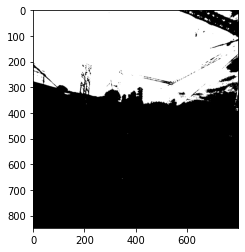

In [21]:
img_path = '/media/thomas/Elements/Thesis_temp_data/all_pics/49_1.jpg'
image = cv2.imread(img_path)
threshold = 160
binary_image = cv2.threshold(image, threshold, 255, cv2.ADAPTIVE_THRESH_MEAN_C)
plt.imshow(binary_image[1],cmap='gray')
cv2.imwrite('/media/thomas/Elements/underexposed.png',binary_image[1])


In [17]:
def downsample_image(image, factor=1):
        img = np.array(image, dtype='float32')
        img = torch.from_numpy(img.reshape(1, 1, img.shape[0], img.shape[1]))  # Convert grayscale image to tensor
        maxPool = torch.nn.AvgPool2d(factor)  # 4*4 window, maximum pooling with a step size of 4
        img_tensor = maxPool(img)
        img = torch.squeeze(img_tensor)  # Remove the dimension of 1
        img = img.numpy().astype('uint8')  # Conversion format, ready to output
        return img